In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [3]:
x = df.drop(['price'],axis = 1)
y = df['price']

In [4]:
x.shape

(20, 2)

In [5]:
y.shape

(20,)

In [6]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
x_scaled = sc.fit_transform(x)

sy = MinMaxScaler()
y = y.values.reshape(20,1)
y_scaled = sy.fit_transform(y)

In [7]:
x_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
y_scaled = y_scaled.reshape(20,)

In [10]:
y_scaled.shape

(20,)

In [11]:
def sigmoid_numpy(x):
    return 1/(1 + np.exp(-x))

In [12]:
def log_loss(y_true,y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1 - epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [13]:
def mini_batch_gradient_descent(x,y_true,epochs,batch_size):
    
    number_of_features = x.shape[1]
        
    w = np.ones(shape=(number_of_features))
    
    cost_list = []
    epoch_list = []
    
    bias = 0
    rate = 0.001
    n = x.shape[0]
    
    if(batch_size > n):
        batch_size = n
        
    for i in range(epochs):
        random_indices = np.random.permutation(n)
        x_tmp = x[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,n,batch_size):
            xj = x_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            
            y_predicted = np.dot(w,np.transpose(xj)) + bias
    
            w_d = -(2/len(xj))*np.dot(np.transpose(xj), yj - y_predicted)
            bias_d = -(2/len(xj))*np.sum(yj - y_predicted)

            w = w - rate * w_d
            bias = bias - rate * bias_d
        
            cost = np.mean(np.square(yj-y_predicted))
            if (i % 10 == 0):
                cost_list.append(cost)
                epoch_list.append(i)

    return w, bias,epoch_list,cost_list

In [14]:
w,bias,epoch_list,cost_list = mini_batch_gradient_descent(x_scaled,y_scaled,500,10)

In [15]:
w,bias

(array([0.82049979, 0.78859006]), -0.3019901131323689)

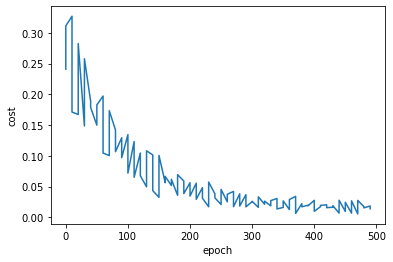

In [16]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [17]:
def predict(area,bedrooms,w,b):
    scaled_X = sc.transform([[area, bedrooms]])[0]

    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]

In [18]:
predict(2600,4,w,bias)

139.82830193889586

In [19]:
df.iloc[10]

area        1800.0
bedrooms       3.0
price         82.0
Name: 10, dtype: float64

In [20]:
predict(1800,3,w,bias)

82.65684352057872